In [14]:
import pandas as pd
import requests
import json

def nb_ngram(terms, corpus='bok', smooth=3, years=(1810, 2010), mode='relative', lang='nob', case_sens = 0, freq='rel'):
    df = ngram_conv(
        get_ngram(
            terms, 
            corpus = corpus,
            lang = lang,
            case_sens = case_sens,
            freq = freq
        ), 
        smooth = smooth, 
        years = years, 
        mode = freq
    )
    df.index = df.index.astype(int)
    return df

def get_ngram(terms, corpus='avis', lang='nob',case_sens=1, freq='rel'):
    req = requests.get(
        "http://www.nb.no/sp_tjenester/beta/ngram_1/ngram/query", params = {
            'terms': terms,
            'corpus': corpus,
            'lang': lang,
            'case_sens': case_sens,
            'freq': freq
        })
    if req.status_code == 200:
        res = req.text
    else:
        res = "[]"
    return json.loads(res)

def ngram_conv(ngrams, smooth=1, years=(1810,2013), mode='relative'):
    ngc = {}
    # check if relative frequency or absolute frequency is in question
    if mode.startswith('rel') or mode=='y':
        arg = 'y'
    else:
        arg = 'f'
    for x in ngrams:
        if x != []:
            ngc[x['key']] = {z['x']:z[arg] for z in x['values'] if int(z['x']) <= years[1] and int(z['x']) >= years[0]}
    return pd.DataFrame(ngc).rolling(window=smooth, win_type='triang').mean()

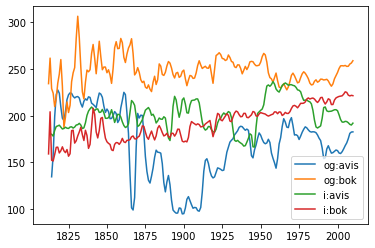

In [29]:
(nb_ngram('og:avis, og:bok, i:avis, i:bok', case_sens=1, lang = 'nno').sort_index()*100).plot()